# Medalla: Exploring the data behind Eth2

### This analysis aims to extract insights from statistics compiled from validators running the eth2.0 phase 0 multi-client beacon chain testnet, `Medalla`.

### Our main objective is to explore the concept of `slashed validators`, while also diving specifically into which of  the `Eth2 clients` that validators use have been the most slashed.

Since Ethereum project launched in 2015, through all these years there have been many upgrades: 
-    Frontier,
-    Frontier Thawing,
-    Homestead,
-    Dao Fork,
-    Spurius Dragon,
-    Byzantium,
-    Constantinople and
-    Istanbul.
    
These have forged the network we know today as `Eth1 chain` or `Proof of Work chain`. The roadmap for the Ethereum technology is shifting paradigms, in order to adopt a new `Proof of Stake` methodology, which in essence changes the way the decissions of valid computations are done in the Ethereum network. When deployed in their entirity, this change would bring new security and scalability to the entire Ethereum network, and users will be able to migrate voluntarily from `Eth1` to `Eth2`.

Before we dig deeper into data, we’ll briefly cover what’s going on behind Eth2, and why it’s different from the current state of Ethereum. 

In general terms, the Ethereum network is currently: 

 - Slow and difficult to scale, processing from 15 to 30 transactions per second.
 - In *potencial risk* of centralization from mining pools and other large actors. 
 - At full capacity and with high transaction fees, with some large contract calls costing as much as 40 USD.
 - Still increasing in usage as of October 2020.
    
This has been enough for the Ethereum community to begin working towards a new, more verstile, and robust approach.
    
## eth2.0 phases

Eth2.0 is major upgrade when compared to the current state of Ethereum: *a transition from proof of work to proof of stake*. [This current roadmap is divided in 4 phases](https://docs.ethhub.io/ethereum-roadmap/ethereum-2.0/eth-2.0-phases/):

 -  Phase 0 - Beacon chain
 -  Phase 1 - Data sharding
 -  Phase 2 - State + execution
 -  Phase 3 - STARKS, further scaling
    
> ## `Medalla` is the final test before the launch of phase 0 of Ethereum2.0 update. 

This Medalla testnet has been running for more than 2 months on top of the Görli testnet, and so far it is being constantly validated by five main clients, including:
- Prysmatic Labs (Prysm), 
- ChainSafe’s (Lodestar), 
- PegaSys’ (Teku), 
- Status’ (Nimbus) 
- and Sigma Prime’s (Lighthouse).

In [1]:
print("""

We'll use a combination of well known python libraries 
and a PostgreSQL database dump to build a primitive data
pipeline which can be used by junior data scientists to
further understand about validators, clients, and slashing.

So, are you ready for some eth data?

""")



We'll use a combination of well known python libraries 
and a PostgreSQL database dump to build a primitive data
pipeline which can be used by junior data scientists to
further understand about validators, clients, and slashing.

So, are you ready for some eth data?




In [2]:
!python3 --version

Python 3.8.6


In [3]:
# import your modules
import psycopg2
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sqlalchemy

## 🏅 Part I - Basic network comparisons

To begin, here's a quick comparison of the transactions per second on the Bitcoin network vs the Ethereum network today.

Text(0.5, 1.0, 'Estimated transactions per second on the different networks')

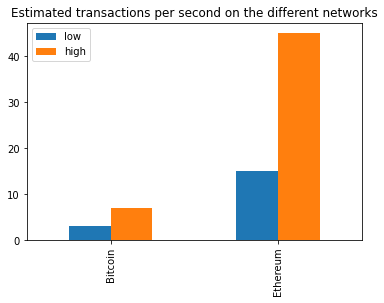

In [4]:
networks = {"Bitcoin":(3,7),
           "Ethereum":(15,45)}

df = pd.DataFrame.from_dict(networks).transpose()
df.columns = ("low", "high")

df.plot.bar()
plt.title("Estimated transactions per second on the different networks")

### For Eth2, we want to increase scalability (Transactions Per Second) of the network while not compromising decentralization. 

When compared to other centralized solutions like Visa, which can process around 10.000 transactions per second, the current state of the Ethereum technology falls greatly behind. This is one of the reasons why the technology is not prepared for massive adoption, and why initiatives like Ethereum 2.0 are currently being pushed forward so behemently.

>Vitalik Buterin estimates that once **optimistic rollups** are fully implemented and the transition to Eth2 begins, the Ethereum network will be able to process 100,000 transactions per second (during Phase 1.5). In Eth2, with its sharded infrastructure, 1000-5000 TPS will be achievable.

It is important to note that while the deployment of Eth2's Phase 0 will not increase the Layer 1 Transactions Per Second, today there are various **rollup solutions** which would allow a [100x scaling](https://twitter.com/VitalikButerin/status/1312905882330521600) of the current network.

Let's visualize these concepts for comparison, while considering other technologies like EOS and Visa:

In [5]:
networks["Ethereum w/ rollups"] = (1500, 3000)
networks["Eth2 (Phase 1.5)"] = (1000, 5000) 
networks["Eth2 (Phase 1.5) w/ rollups"] = (25000, 100000) 
networks["EOS"] = (4000,9000)
networks["Visa"] = (9000,11000)

,low,high
Bitcoin,3,7
Ethereum,15,45
Eth2 (Phase 1.5),1000,5000
Ethereum w/ rollups,1500,3000
EOS,4000,9000
Visa,9000,11000
Eth2 (Phase 1.5) w/ rollups,25000,100000


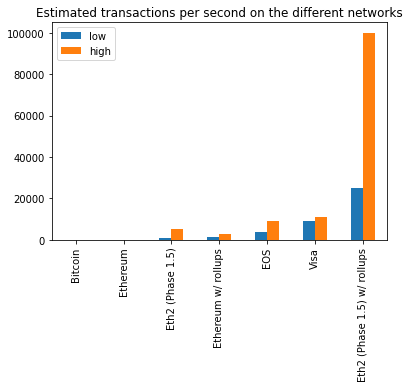

In [6]:
df = pd.DataFrame.from_dict(networks).transpose()
df.columns = ("low", "high")
df = df.sort_values(by=["low"])
df.plot.bar()
plt.title("Estimated transactions per second on the different networks")
df

## 🏅 Part II - Ethereum Roadmap

To continue, here is the result if we only consider Ethereum technology throughout their initial phases and with existing rollup technologies.

Text(0.5, 1.0, 'Estimated transactions per second with the development of Eth2')

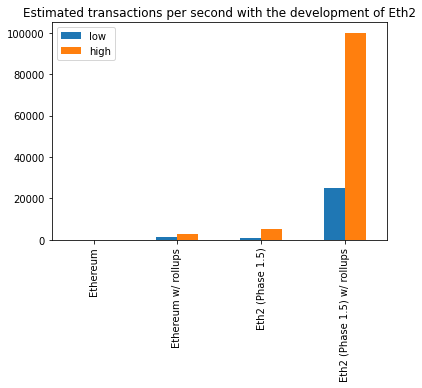

In [7]:
Eth_comparison = df.transpose()[["Ethereum", "Ethereum w/ rollups", "Eth2 (Phase 1.5)", "Eth2 (Phase 1.5) w/ rollups"]].transpose()
Eth_comparison.plot.bar()
plt.title("Estimated transactions per second with the development of Eth2")

## As of today, we can achieve between 1500 and 3000 TPS in Eth1 with Rollups. 

This is a substantial increase when compared to the Bitcoin network, but falls short of solutions like Visa or EOS. Therefore, reaching Eth2 Phase 1.5 is crucial to increase the TPS of the network by several orders of magnitude.

With a clear goal of increasing the Transactions Per Second and a roadmap in mind, let's dive deeper into the concepts which will allow the initial Eth2 increase

- **The Beacon chain**: This is the initial step towards scaling ethereum's "layer 1". On the Eth2 roadmap, the deployment of the Beacon Chain will be done on the Phase 0. The Beacon chain manages the consensus, storing information about the approved active proof of stake validators in the system and what messages they have sent into the chain. It acts as a kind of central chain that the shard chains will eventually hold data into.


- **The sidechains or Shards**: These are Ethereum Virtual Machines which are also connected with the beacon chain. They help lower the load of transactions from the beacon chain by storing most of the data in them, and passing only a gist of their information (in the shape of address balances, Merkle roots, or rollups).


- **Slots**: `32 Slots = 1 Epoch`. A time period of 12 seconds in which a randomly chosen validator has time to propose a block. Each slot may or may not have a block in it. The total number of validators is split up in committees and one or more individual committees are responsible to attest to each slot. One validator from the committee will be chosen to be the aggregator, while the other 127 validators are attesting. After each Epoch, the validators are mixed and merged to new committees. There is a minimum of 128 validators per committee.


- **Epochs**: `1 Epoch = 32 Slots`. Represents the number of 32 slots and takes approximately 6.4 minutes. Epochs play an important role when it comes to the validator queue and finality. 


- **Validators**: Individuals who participate by proposing and attesting for blocks. Validators need to deposit 32 ETH into the validator deposit contract on the Ethereum 1.0 chain. A validator has to be online for at least 50% of the time in order to have positive returns. 

 
- **Slasher**: The slasher's purpose is to find malicious validators in the Ethereum 2.0 network and report slashable offenses to the beacon-node. is its own entity but requires a beacon-node to receive attestations. To find malicious activity by validators, the slashers iterates through all received attestations until a slashable offense is found. Found slashings are broadcasted to the network and the next block proposer adds the proof to the block. The block proposer get the reward for slashing - not the whistleblower(=Slasher).
 
 
- **Penalties**: It's a small negative reward for the validator (e.g. for going offline)
 
 
- **Slashing**: Large penalty for the validator (1-32 eth of balance at staked) and a forceful exit. 


## 🏅 Part III - Data Wrangling

And now, we'll use our data skills to build a primitive pipeline that answers the question:

- `Which Eth2 clients are getting slashed?`



The dataset:


> We'll use in this case is the `chain-3416984.dmp`, exported from **ChainID**

>This free tool was developed by [Jim McDonald @jgm](https://github.com/wealdtech/chaind). It connects to the Eth2 testnet and sources the information used below for the data pipeline. Initially, chainid is configured to work with PostgreSQL, the data is stored in a `BYTEA` format, which was not easily decodable during our exploration, but the richness of the chain dataset did bring benefits, even when using encoded data.

>We have used the ChainID tables of `t_blocks` and `t_validators`

> The columns of `f_index` and `f_proposer_index` respectively are the validator index. Every validator that enters the system is consecutively assigned a unique validator index number, so we have used this key piece of information to build our research.

The database:

> We'll use sqlalchemy, which can read the PostgreSQL database, solely because it's the backbone of ChainID.

> It is important to note again that the PostgreSQL data in question is mostly in `BYTEA` format, and decoding it was not straight forward. To save time, we have decided to use a simple apply/map of the graffiti `bytea` string and creating a new column on our dataframes to categorize the client used.




In [8]:
# Standard connection to the postgresql database with the chainid dataset

def connect(user, password, db, host='localhost', port=5432):
    '''Returns a connection and a metadata object'''
    # We connect with the help of the PostgreSQL URL
    url = 'postgresql://{}:{}@{}:{}/{}'
    url = url.format(user, password, host, port, db)

    # The return value of create_engine() is our connection object
    con = sqlalchemy.create_engine(url, client_encoding='utf8')

    # We then bind the connection to MetaData()
    meta = sqlalchemy.MetaData(bind=con, reflect=True)

    return con, meta

conn, meta = connect('chain', 'medalla', 'chain')

# printing the available tables
conn.table_names()

<ipython-input-8-35e8229931e4>:13: SADeprecationWarning: The MetaData.reflect flag is deprecated and will be removed in a future release.   Please use the MetaData.reflect() method.
  meta = sqlalchemy.MetaData(bind=con, reflect=True)


['t_attester_slashings',
 't_voluntary_exits',
 't_beacon_committees',
 't_proposer_slashings',
 't_metadata',
 't_proposer_duties',
 't_validators',
 't_blocks',
 't_attestations']

**Choosing the data**: 

> ## *The graffiti*

> We'll use the `t_blocks` table, specifically checking the `f_graffiti` column data to identify the client being used by the validator. These graffitis are arbitrary strings of text that validators can purposely use to leave a message, and they are very often used to just list the client used to run the Eth2 validator node.

In [9]:
blocks_df = pd.read_sql_table('t_blocks', con=conn)
print(blocks_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220369 entries, 0 to 220368
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   f_slot                220369 non-null  int64 
 1   f_proposer_index      220369 non-null  int64 
 2   f_root                220369 non-null  object
 3   f_graffiti            220369 non-null  object
 4   f_randao_reveal       220369 non-null  object
 5   f_body_root           220369 non-null  object
 6   f_parent_root         220369 non-null  object
 7   f_state_root          220369 non-null  object
 8   f_eth1_block_hash     220369 non-null  object
 9   f_eth1_deposit_count  220369 non-null  int64 
 10  f_eth1_deposit_root   220369 non-null  object
dtypes: int64(3), object(8)
memory usage: 18.5+ MB
None


**Correct indexing**: 

We'll use the `f_proposer_index` column as the unique identifier of all validators.

In [10]:
blocks_df.index = blocks_df.f_proposer_index
blocks_df.head()

,f_slot,f_proposer_index,f_root,f_graffiti,f_randao_reveal,f_body_root,f_parent_root,f_state_root,f_eth1_block_hash,f_eth1_deposit_count,f_eth1_deposit_root
f_proposer_index,,,,,,,,,,,
0,0,0,b'\xeb\xe4\x98C\xe9nS\x85\x92\xc9\xe1\x97n\x15...,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,b'\xcc\xb6$`i+\xe0\xec\x81;V\xbe\x97\xf6\x8a\x...,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,"b'\xafj\xaf\xa9M\xcc""\xa5\xcf\x02S\xc4\xf5\xdd...",b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,0,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...
9804,1,9804,b'O\x04.a\xcb\xf7JPdXOv\x19Qg\x9c\x92\x84M\x8b...,b' \xce\x9e NLP \xce\x9e \x00\x00\x00\x00\x0...,b'\xae1\xd2\x1e;\xdcwq%v\xdd\xab\xae`\xf5\x1e5...,"b'(],\xf0\xdd\xc5\xe3L\x84\xa6\x1bl\xe9\r\xceY...",b'\xeb\xe4\x98C\xe9nS\x85\x92\xc9\xe1\x97n\x15...,b'\x88\xca\xa8\xd6\xe2\xcdkV\xd6\x88\xe1\xcdW9...,b'V\x0f\t\xb4@\xe50\xd7\xfe\xe7\xed\x01\xc5D\x...,22637,b'S\xd9\x0fw\x8f\x97]\xcc\xa3\xf3\x0e\x07+\\\x...
4488,3,4488,b'!\xddT\xcc\x88\x83?7fn\xd4\xfa6I\xb3\x1a}U\x...,b'poapg4eM7/cwRi/ZhaZg0zp6b9A6JlcA',"b""\xb3\xe4\xfb\xe3\xb3%/\xb5l\xb6\x99\x03\xd7\...","b'K\x95x\x90\xfd\x19\xab\xb2\xf3\xa4""\xeaC\xee...",b'O\x04.a\xcb\xf7JPdXOv\x19Qg\x9c\x92\x84M\x8b...,b'\x81|\x1d{\xf2\xf4/\xab\xa7\xa3\x8e\xee\x00E...,b'\xe0\xc0W33U\x95n\x8f\xb8\xd8\x83\x82\xf5gk\...,22637,b'S\xd9\x0fw\x8f\x97]\xcc\xa3\xf3\x0e\x07+\\\x...
1072,4,1072,"b'5\xb6""\xb5\xf4!T\xf9)O\xd8\x8e\x95\xcfY\x169...",b'Lighthouse/v0.2.0/f26adc0a\x00\x00\x00\x00\x...,b'\x85\x05\xab\xae\xfcV\x85\x07\xf1\xdf\xee\xb...,b'Gn\xb5\xf0\xfe\xf6\x0f-\x14\x08J\xf8\xcbj\xc...,b'!\xddT\xcc\x88\x83?7fn\xd4\xfa6I\xb3\x1a}U\x...,"b""\x98YQjb\xd9{\xe7\x06GI\x1a\xe1\xa7\xd8V\xd1...",b'\xe0\xc0W33U\x95n\x8f\xb8\xd8\x83\x82\xf5gk\...,22637,b'S\xd9\x0fw\x8f\x97]\xcc\xa3\xf3\x0e\x07+\\\x...
15248,5,15248,b'\xa2B\x92d\x9a\xa3J\x86<\\\x16\xa4\x0e\x92\x...,b'poapA6LBkFIMTl43vRjMZ7V98q636k0A',b'\xb0-\xd7\xfc\xed\x1a\x85\x1c\x11\x13j\xc6L\...,b'f\xff$\x1c\xb2\xc6\xa0B\xfc\xaao\xb0\xa2D\xc...,"b'5\xb6""\xb5\xf4!T\xf9)O\xd8\x8e\x95\xcfY\x169...",b'\x05\xc8 :\xc4\x17\xc1\x9c\xf8\xa8\xd3\x07\x...,b'\xe0\xc0W33U\x95n\x8f\xb8\xd8\x83\x82\xf5gk\...,22637,b'S\xd9\x0fw\x8f\x97]\xcc\xa3\xf3\x0e\x07+\\\x...


**Choosing the data**: 

> ## *The slashing*

> We'll use the `t_validators` table, specifically checking the `f_index` column as the unique identifier of the validator, as well as the `f_slashed` column to know whether a validator has been slashed on that specific slot.

In [11]:
# Loading chainid's validator's table as a dataframe
validators_df = pd.read_sql_table('t_validators', con=conn)

# Set f_index as dataframe index
validators_df.index = validators_df.f_index
validators_df.head()

,f_public_key,f_index,f_slashed,f_activation_eligibility_epoch,f_activation_epoch,f_exit_epoch,f_withdrawable_epoch,f_effective_balance
f_index,,,,,,,,
5057,b'\x8b\x93\x04o\x19\x0e$\x94\xf1\xcd\xa9`r0\xb...,5057,False,0,0,-1,-1,31000000000
37879,b'\xb6@\x8f\xce{\x0e\xcf\x96Q\x05e\xe7\x91`\xb...,37879,False,3776,4680,-1,-1,32000000000
7990,b'\xb08\x1c\xb8\x16\xbb\x1a\xc8t\xe4!\xba\xc6\...,7990,False,0,0,-1,-1,31000000000
19429,"b""\xa2\xaa\x18\xd4\xdd\xb2\x86\xef \xd4%\xd1\x...",19429,False,0,0,-1,-1,31000000000
55440,b'\xa8\xea\xa9\x9fk\x94\xa9\xdd\x7f-\xf1\x98\x...,55440,False,6264,9070,-1,-1,32000000000
...,...,...,...,...,...,...,...,...
50931,b'\x99LF\xd7\xb9\xe5n\xa2e\xe5\rm\xd2#X\xffYB\...,50931,False,4666,7943,-1,-1,32000000000
61623,b'\xb8\xb4\x18\x19\xbbxjE\x0b\xa4\x81K\xdfYyW\...,61623,False,8155,-1,-1,-1,32000000000
9013,"b'\x86\x95\x8f\x0e\x17,H2\x98WP""\x07\x9b\xe6:\...",9013,False,0,0,-1,-1,30000000000


## 🏅 Slashings Overview 

In [36]:
slashed_data = validators_df.f_slashed.value_counts()
sd = {'False': slashed_data[0],
      'True': slashed_data[1]}

rows = sd['False']+sd['True']
print(f"From the {rows} rows in this dataset, we have identified {sd['True']} cases where the validators were slashed, and {sd['False']} where they were not slashed.")

print(f"\nIn other words, in this dataset the validators were slashed {sd['True']/rows*100}% of the times logged")

From the 67291 rows in this dataset, we have identified 5181 cases where the validators were slashed, and 62110 where they were not slashed.

In other words, in this dataset the validators were slashed 7.699395164286457% of the times logged


False    62110
True      5181
Name: f_slashed, dtype: int64

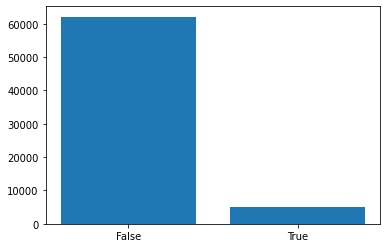

In [37]:
# Visual representation
plt.bar(sd.keys(), sd.values())
slashed_data

## 🏅 Slashings by client used 
This classification was done by using the graffiti string, and manually asigning them a name based on our limited knowledge of Eth2 Clients.

In [13]:
# Joining the two tables, using the `f_index`
data = blocks_df.join(validators_df)

In [14]:
# Manual counting of the occurrences in the block graffiti

def client_identifier(grafitti):
    e = grafitti
    if b'Lighthouse' in e:
        return 'Lighthouse'

    elif b'teku' in e:
        return 'Teku'
    elif b'Nimbus' in e:
        return 'Nimbus'
    elif b'Lodestar' in e:
        return 'Lodestar'
    elif b'Pukara' in e:
        return 'Pukara'
    elif b'poap' in e:
        return 'Poap'
    elif b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00' in e:
        return 'blank graffiti'
    else:
        return 'unknown'

data['client'] = data.f_graffiti.apply(client_identifier)
clients = data.client.value_counts()

blank graffiti    106411
Poap               57455
unknown            29696
Lighthouse         13994
Teku                9040
Nimbus              3517
Pukara               256
Name: client, dtype: int64


<BarContainer object of 7 artists>

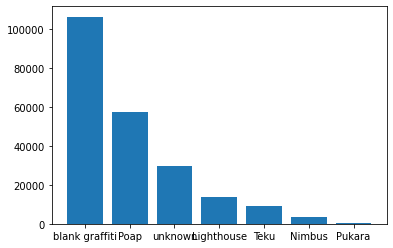

In [39]:
#Visualizing distribution of Eth2 clients in our dataset
print(clients)
plt.bar(clients.index[0:], clients.values[0:])

Text(0.5, 1.0, 'Visualization of identified and unidentified clients in the Medalla testnet')

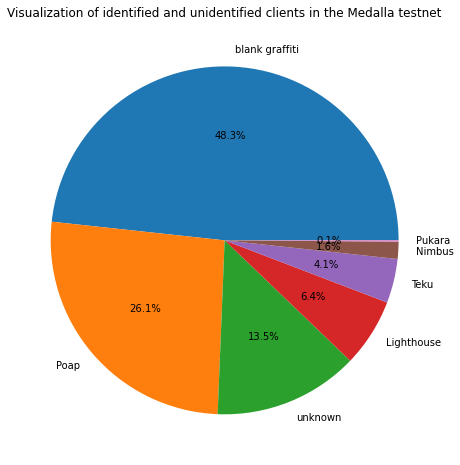

In [45]:
plt.figure(figsize=(8,8))
plt.pie(clients.values[0:], labels= clients.index[0:], autopct='%1.1f%%')
plt.title('Visualization of identified and unidentified clients in the Medalla testnet')

> ### Finally, we will look into which of these clients have been slashed more frequently.

In [20]:
results = data[data.f_slashed].client.value_counts() 
results

blank graffiti    11743
unknown            3169
Poap                746
Lighthouse           47
Nimbus               34
Name: client, dtype: int64

Text(0.5, 1.0, 'Number of slashes per grafitti logs')

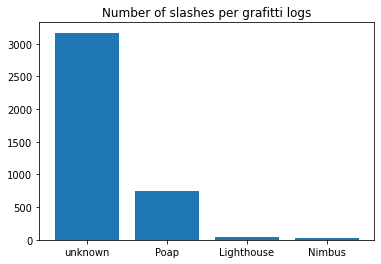

In [21]:
plt.bar(results.index[1:], results.values[1:])
plt.title('Number of slashes per grafitti logs')

Text(0.5, 1.0, 'Chart of identified and identifiable clients in the dataset which had been slashed')

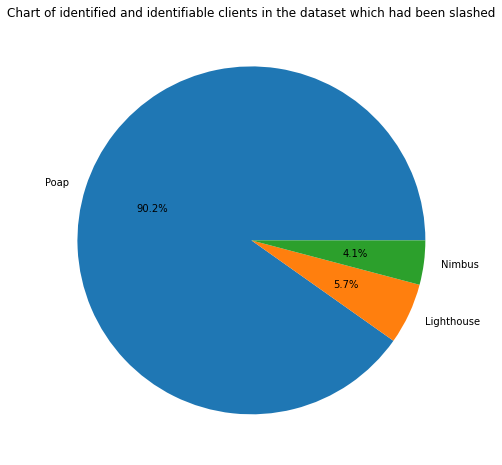

In [53]:
plt.figure(figsize=(8,8))
plt.pie(results.values[2:], labels= results.index[2:], autopct='%1.1f%%')
plt.title('Chart of identified and identifiable clients in the dataset which had been slashed')

## Conclusions 

When comparing the ammount of slashes identified, we can highlight:
 - About 8% of validators get slashed.
 - The `Nimbus` and `Lighthouse` clients were identified as the most slashed clients.
 - It is not clear in the documentation what happens with the accumulated balance due to penalties and slashing.
 - We have noticed that there could be a positive correlation between the client used by the validators and the frequency of slashing.
 
## Suggestions
- *Looking deeper into why `Lighthouse` and `Nimbus` seem to be the most slashed clients.*
- Exploring the data around the `poap` graffities, which are formatted by  early adopters of the tech to obtain Non-Fungible tokens. The poap graffities themselves can shed a light on what type of client the validator was running when they were slashed.
- Connecting this primitive pipeline with a live ChainID database, and explore the data in real time in a web browser.

### Deliverables:
    In the `OUTPUT` folder of this repo we have included a .csv file with the joined dataframes for future researchers to leverage without needing to set up Postgres or ChainID
    
### Credits
This notebook was prepared by the [dOrg DAO](https://dorg.tech) for the Eth2 Medalla Data Challenge, organized by the Ethereum foundation. Contributions were made by
 - Roberto Henríquez
 - Nathanael Mueller
 - Paul Díaz